In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data.csv')

data = data[~data['CustomerID'].isna()].reset_index(drop=True)
print len(data)
print data.keys()
import matplotlib.pyplot as plt
data['TotalRevenue'] = data['Quantity']*data['UnitPrice']/1#interpretation
print data.iloc[5000:5005]

406829
Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country'],
      dtype='object')
     InvoiceNo StockCode                     Description  Quantity  \
5000    537026     22551        PLASTERS IN TIN SPACEBOY        12   
5001    537026    85099B         JUMBO BAG RED RETROSPOT        10   
5002    537026     22355       CHARLOTTE BAG SUKI DESIGN        10   
5003    537026     84992  72 SWEETHEART FAIRY CAKE CASES        24   
5004    537026      POST                         POSTAGE         2   

          InvoiceDate  UnitPrice  CustomerID  Country  TotalRevenue  
5000  12/3/2010 16:35       1.65     12395.0  Belgium          19.8  
5001  12/3/2010 16:35       1.95     12395.0  Belgium          19.5  
5002  12/3/2010 16:35       0.85     12395.0  Belgium           8.5  
5003  12/3/2010 16:35       0.55     12395.0  Belgium          13.2  
5004  12/3/2010 16:35      18.00     12395.0  Belgium          36.0  


In [2]:
data['Month'] = data['InvoiceDate'].apply(lambda x : x.split('/')[0]).astype(np.uint8)
data['Day'] = data['InvoiceDate'].apply(lambda x : x.split('/')[1]).astype(np.uint8)
data['Year'] = data['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[0]).astype(np.uint16)
data['Time'] = data['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[1])
data['Hour']= data['Time'].apply(lambda x : x.split(':')[0]).astype(np.uint8)
data['Min']= data['Time'].apply(lambda x : x.split(':')[1]).astype(np.uint8)
print data.head()

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  Month  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom         15.30     12   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom         20.34     12   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom         22.00     12   
3  12/1/2010 8:26       3.39     17850.0  United Kingdom         20.34     12   
4  12/1/2010 8:26       3.39     17850.0  United Kingdom         20.34     12   

   Day  Year  Time  Hour  Min  
0    1  2010  8:26     8   26  
1    1  2010  8:

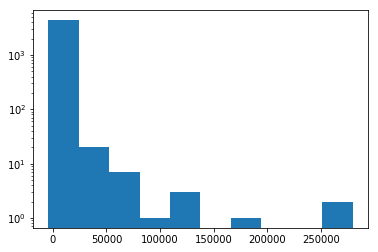

In [3]:
temp = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
plt.hist(temp.TotalRevenue);plt.yscale('log');plt.show()

# different scales, from the following, hence use log scale

(array([4.31e+03, 1.20e+01, 3.00e+00, 1.00e+00, 0.00e+00, 2.00e+00]), array([     0,  50000, 100000, 150000, 200000, 250000, 300000]), <a list of 6 Patch objects>)


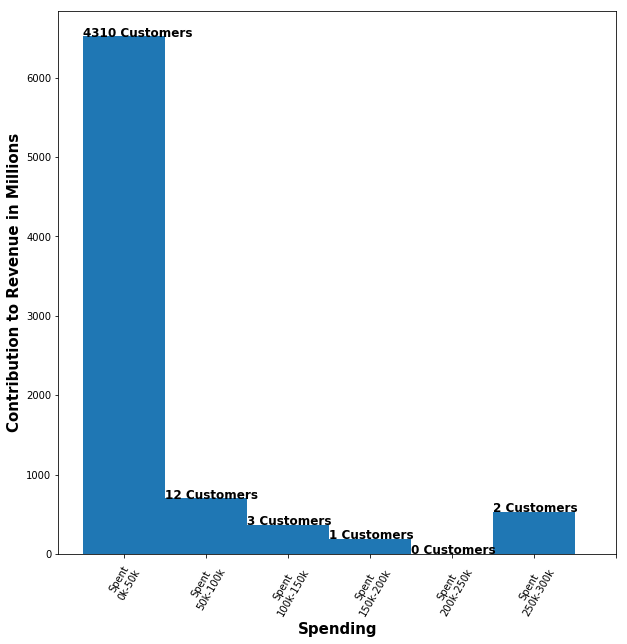

In [4]:
#ignoring customers who causes losses because they are small portion of revenue
bins=range(0,300001,50000)
xx=plt.hist(temp['TotalRevenue'],bins=bins)
print xx
plt.close()
plt.subplots(figsize=(10,10))
xxx=plt.hist(temp['TotalRevenue'],weights = temp['TotalRevenue'].values/1000, bins=bins)
for i in range(len(xxx[1])-1):
    plt.text(xxx[1][i],xxx[0][i]+0.03,str(int(xx[0][i]))+' Customers',fontsize=12,fontweight='bold')
plt.xticks(np.array(bins)+25000,['Spent\n' + str(bins[x]/1000)+'k-'+str(bins[x+1]/1000)+'k' for x in  range(len(bins)-1)],rotation=60)
plt.xlabel('Spending',fontsize=15,fontweight='bold')
plt.ylabel('Contribution to Revenue in Millions',fontsize=15,fontweight='bold')
plt.show()

In [5]:
#identiy bad customers

In [6]:
def f(x):
    if  x[:-1].isdigit() and x[-1].isdigit() is False:
        return x[:-1]
    else : return x
data['StockCode_NR'] = data['StockCode'].apply(f)

#returns cost 0.1%, so ignore first
data = data[data['TotalRevenue']>0].reset_index(drop=True)

0 Top 0.01 percent of customers,3.0 percent of profit
4 Top 0.1 percent of customers,12.0 percent of profit
43 Top 1 percent of customers,32.0 percent of profit
86 Top 2 percent of customers,39.0 percent of profit
216 Top 5 percent of customers,50.0 percent of profit
433 Top 10 percent of customers,61.0 percent of profit
867 Top 20 percent of customers,75.0 percent of profit
2169 Top 50 percent of customers,92.0 percent of profit


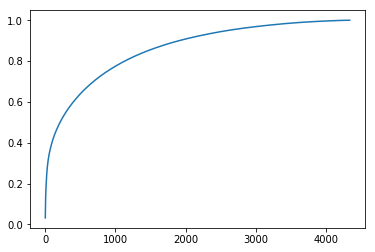

In [7]:
# are there any subgroups of important customer
temp = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
temp2 = temp.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=True)
result,val = [] ,0
for i in range(len(temp2)):
    val += temp2.iloc[i]['TotalRevenue']
    result += [val,]
temp2['cummulative_profit'] = np.array(result)/val
for i in [0.01,0.1,1,2,5,10,20,50]:
    num = int(len(temp2)*1.*i/100)
    print num,
    print 'Top %s percent of customers,%s percent of profit'%(i,100*np.round(temp2.loc[num]['cummulative_profit'],2))
plt.plot(temp2['cummulative_profit']);plt.show()

0 Top 0.01 percent of products,2.0 percent of profit
3 Top 0.1 percent of products,5.0 percent of profit
32 Top 1 percent of products,14.000000000000002 percent of profit
64 Top 2 percent of products,22.0 percent of profit
160 Top 5 percent of products,37.0 percent of profit
320 Top 10 percent of products,51.0 percent of profit
640 Top 20 percent of products,70.0 percent of profit
1600 Top 50 percent of products,91.0 percent of profit
1920 Top 60 percent of products,94.0 percent of profit


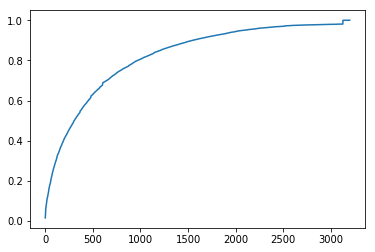

2677
threshold= 10 , 0.84 of products account for 0.975 of revenue




In [8]:
# are there any subgroups of important customer
temp = data.groupby(['StockCode_NR'])['TotalRevenue'].apply(sum).reset_index(drop=False)
temp['num_times_brought'] = data.groupby(['StockCode_NR'])['TotalRevenue'].apply(len).reset_index(drop=True)
temp2 = temp.sort_values('num_times_brought').iloc[::-1].reset_index(drop=True)

result,val = [0,] ,0
for i in range(len(temp2)):
    val += temp2.iloc[i]['TotalRevenue']
    result += [val,]
temp2['cummulative_profit'] = np.array(result[1:])/val
temp2['Total_profit'] = (np.array(result[1:])-np.array(result[:-1]))/val
for i in [0.01,0.1,1,2,5,10,20,50,60]:
    num = int(len(temp2)*1.*i/100)
    print num,
    print 'Top %s percent of products,%s percent of profit'%(i,100*np.round(temp2.loc[num]['cummulative_profit'],2))
plt.plot(temp2['cummulative_profit']);plt.show()
x = 10
print np.sum(temp2['num_times_brought']>x)
print 'threshold=',x,',',np.round(np.mean(temp2['num_times_brought']>x),2),'of products account for',
print np.round(np.sum(temp2[temp2['num_times_brought']>x]['TotalRevenue'])/np.sum(temp2['TotalRevenue']),3),'of revenue\n\n'
temp3 = temp2[temp2['num_times_brought']>x]
data2 = pd.merge(data,temp3[['StockCode_NR','num_times_brought','Total_profit']]
         ,on='StockCode_NR',how='inner')


In [9]:
customer_info = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
customer_info = customer_info.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=False)

for year in pd.unique(data.Year):
    for month in sorted(map(int,pd.unique(data.Month))):
        temp0  =  data2[(data2.Year==year) & (data2.Month==month)]
        if len(temp0) == 0:
            continue
        temp = temp0.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
        temp2 = temp.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=True)
        result,val = [] ,0
        for i in range(len(temp2)):
            val += temp2.iloc[i]['TotalRevenue']
            result += [val,]
        temp2['cummulative_profit'] = np.array(result)/val
        temp2.rename(columns={'TotalRevenue' : 'Revenue_%s_%s'%(year,month)},inplace=True)
        customer_info = pd.merge(customer_info,temp2[temp2.keys()[:2]],on='CustomerID',how='left').fillna(0)
    

In [10]:
dictt_StockCode = {}
counter = 0
for i in data2.groupby(['num_times_brought','StockCode_NR']).apply(len).reset_index(drop=False)['StockCode_NR'].iloc[::-1]:
    dictt_StockCode[i] = counter
    counter += 1
data2['StockCode_NR_int'] = data2['StockCode_NR'].map(dictt_StockCode)
print counter

2677


In [11]:
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,3,4])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([5])))]
test2 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,])))]
test3 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([7,])))]
test4 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,])))]
test5 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,8,9,10,11])))]

len(train),len(test),len(test2),len(test3),len(test4),len(test5)

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


(115837, 28156, 27028, 26685, 53713, 234170)

In [12]:
#get all orders from customer during time period 
Invoice = train.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info,Invoice,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders'},inplace=True)

Invoice_future = test.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future'},inplace=True)

Invoice_future = test2.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future2'},inplace=True)

Invoice_future = test3.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future3'},inplace=True)

Invoice_future = test4.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future4'},inplace=True)

Invoice_future = test5.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future5'},inplace=True)

customer_info_orders = customer_info_orders.sort_values('CustomerID').reset_index(drop=True)
#print customer_info_orders

In [13]:
customer_info_orders

,index,CustomerID,TotalRevenue,Revenue_2010_12,Revenue_2011_1,Revenue_2011_2,Revenue_2011_3,Revenue_2011_4,Revenue_2011_5,Revenue_2011_6,...,Revenue_2011_9,Revenue_2011_10,Revenue_2011_11,Revenue_2011_12,orders,orders_future,orders_future2,orders_future3,orders_future4,orders_future5
0,0,12346.0,77183.60,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,"([598], [74215])",NaN,NaN,NaN,NaN,NaN
1,1,12347.0,4310.00,674.29,475.39,0.00,0.00,636.25,0.00,382.52,...,0.00,1294.32,0.00,224.82,"([1490, 1490, 77, 77, 25, 25, 40, 40, 138, 519...",NaN,"([25, 419, 435, 1700, 1593, 210, 276, 1200, 11...",NaN,"([25, 419, 435, 1700, 1593, 210, 276, 1200, 11...","([77, 25, 25, 25, 40, 138, 138, 111, 283, 101,..."
2,2,12348.0,1797.24,892.80,227.44,0.00,0.00,367.00,0.00,0.00,...,310.00,0.00,0.00,0.00,"([10, 10, 10, 67, 67, 65, 65, 439, 128, 128, 1...",NaN,NaN,NaN,NaN,"([10, 312, 549], [1, 120, 96])"
3,3,12349.0,1757.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1757.55,0.00,NaN,NaN,NaN,NaN,NaN,"([30, 81, 10, 293, 637, 103, 103, 510, 340, 45..."
4,4,12350.0,334.40,0.00,0.00,334.40,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,"([10, 1019, 100, 217, 1120, 133, 90, 1114, 120...",NaN,NaN,NaN,NaN,NaN
5,5,12352.0,2506.04,0.00,0.00,296.50,1265.31,0.00,0.00,0.00,...,632.50,0.00,311.73,0.00,"([62, 95, 426, 10, 10, 365, 946, 819, 522, 522...",NaN,NaN,NaN,NaN,"([95, 426, 111, 10, 10, 10, 946, 946, 819, 819..."
6,6,12353.0,89.00,0.00,0.00,0.00,0.00,0.00,89.00,0.00,...,0.00,0.00,0.00,0.00,NaN,"([781, 813, 1162, 837], [8, 2, 6, 4])",NaN,NaN,NaN,NaN
7,7,12354.0,1079.40,0.00,0.00,0.00,0.00,1079.40,0.00,0.00,...,0.00,0.00,0.00,0.00,"([532, 81, 56, 410, 246, 111, 7, 6, 293, 900, ...",NaN,NaN,NaN,NaN,NaN
8,8,12355.0,459.40,0.00,0.00,0.00,0.00,0.00,459.40,0.00,...,0.00,0.00,0.00,0.00,NaN,"([526, 526, 526, 2, 42, 58, 744, 837, 478, 93,...",NaN,NaN,NaN,NaN
9,9,12356.0,2811.43,0.00,2271.62,0.00,0.00,481.46,0.00,0.00,...,0.00,0.00,58.35,0.00,"([10, 278, 14, 65, 65, 365, 510, 49, 340, 303,...",NaN,NaN,NaN,NaN,"([2, 176], [2, 3])"


In [14]:
matrix_past = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders']
        for j,k in zip(pdt,quantity):
            matrix_past[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

46

In [15]:
matrix_future = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future']
        for j,k in zip(pdt,quantity):
            matrix_future[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [16]:
matrix_future2 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future2']
        for j,k in zip(pdt,quantity):
            matrix_future2[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [17]:
matrix_future3 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future3']
        for j,k in zip(pdt,quantity):
            matrix_future3[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [18]:
matrix_future4 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future4']
        for j,k in zip(pdt,quantity):
            matrix_future4[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [19]:
matrix_future5 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future5']
        for j,k in zip(pdt,quantity):
            matrix_future5[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [20]:
customer_info_orders.head()

,index,CustomerID,TotalRevenue,Revenue_2010_12,Revenue_2011_1,Revenue_2011_2,Revenue_2011_3,Revenue_2011_4,Revenue_2011_5,Revenue_2011_6,...,Revenue_2011_9,Revenue_2011_10,Revenue_2011_11,Revenue_2011_12,orders,orders_future,orders_future2,orders_future3,orders_future4,orders_future5
0,0,12346.0,77183.60,0.00,77183.60,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,"([598], [74215])",NaN,NaN,NaN,NaN,NaN
1,1,12347.0,4310.00,674.29,475.39,0.0,0.0,636.25,0.0,382.52,...,0.0,1294.32,0.00,224.82,"([1490, 1490, 77, 77, 25, 25, 40, 40, 138, 519...",NaN,"([25, 419, 435, 1700, 1593, 210, 276, 1200, 11...",NaN,"([25, 419, 435, 1700, 1593, 210, 276, 1200, 11...","([77, 25, 25, 25, 40, 138, 138, 111, 283, 101,..."
2,2,12348.0,1797.24,892.80,227.44,0.0,0.0,367.00,0.0,0.00,...,310.0,0.00,0.00,0.00,"([10, 10, 10, 67, 67, 65, 65, 439, 128, 128, 1...",NaN,NaN,NaN,NaN,"([10, 312, 549], [1, 120, 96])"
3,3,12349.0,1757.55,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,1757.55,0.00,NaN,NaN,NaN,NaN,NaN,"([30, 81, 10, 293, 637, 103, 103, 510, 340, 45..."
4,4,12350.0,334.40,0.00,0.00,334.4,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,"([10, 1019, 100, 217, 1120, 133, 90, 1114, 120...",NaN,NaN,NaN,NaN,NaN


In [21]:
# recommendation system , for our case since entries are small, we use SVD to do matrix factorization
# instead of a less expensive but approximate algorithm like alternating last squares. WARNING This is not scalable. 
U,D,V = np.linalg.svd(matrix_past)
print len(D)

2677


0.5875889734703809


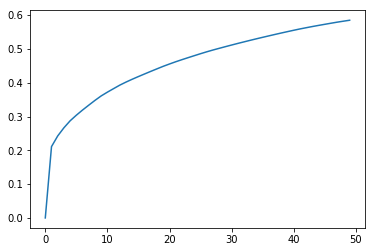

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 6. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [5. 2. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[-6.7653010e-12, -2.9064897e-12, -3.1938525e-12, ...,
        -2.6639223e-17, -1.1083440e-16, -4.5317480e-13],
       [ 1.3502898e+00,  1.1947862e+00,  1.7976288e+00, ...,
         3.0565967e-05,  1.6843794e-03,  7.5786108e-01],
       [-1.5179424e+00, -1.7305107e+00, -3.4387262e+00, ...,
        -2.3869886e-04,  1.5074478e-03,  1.6827875e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 6.3616686e+00,  2.8276072e+00,  1.7173554e-01, ...,
         3.9762817e-05,  1.8657855e-04,  9.7939238e-02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [61]:
num = 50
U2=U[:,:num]
D2=D[:num]
V2=V[:num]
Z = sum(D)
print sum(D2)/Z
plt.plot(map(lambda x : np.sum(D[:x])/Z,range(len(D2))))
plt.show()
print matrix_past
np.matmul(np.matmul(U2,np.diag(D2)),V2)

In [63]:
customer_info_orders.iloc[0]

index                                0
CustomerID                       12346
TotalRevenue                   77183.6
Revenue_2010_12                      0
Revenue_2011_1                 77183.6
Revenue_2011_2                       0
Revenue_2011_3                       0
Revenue_2011_4                       0
Revenue_2011_5                       0
Revenue_2011_6                       0
Revenue_2011_7                       0
Revenue_2011_8                       0
Revenue_2011_9                       0
Revenue_2011_10                      0
Revenue_2011_11                      0
Revenue_2011_12                      0
orders                ([598], [74215])
orders_future                      NaN
orders_future2                     NaN
orders_future3                     NaN
orders_future4                     NaN
orders_future5                     NaN
svd_0                               -1
svd_1                     -1.38778e-16
svd_2                     -2.08167e-16
svd_3                    

In [62]:
for i in range(counter):
    None#customer_info_orders[i] = matrix_past[:,i].astype(np.uint16)
for i in range(U2.shape[1]):
    customer_info_orders['svd_'+str(i)] = U2[:,i].astype(np.float32)

In [25]:
colsA =  ['Revenue_2011_' + str(x) for x in [1,2,3,4]]+['Revenue_2010_12']
#print np.corrcoef(customer_info_orders['target2'].values,
#           np.mean(np.log10(1+customer_info_orders[colsA].values),1))

In [26]:
customer_info_orders.iloc[0]

index                             0
CustomerID                    12346
TotalRevenue                77183.6
Revenue_2010_12                   0
Revenue_2011_1              77183.6
Revenue_2011_2                    0
Revenue_2011_3                    0
Revenue_2011_4                    0
Revenue_2011_5                    0
Revenue_2011_6                    0
Revenue_2011_7                    0
Revenue_2011_8                    0
Revenue_2011_9                    0
Revenue_2011_10                   0
Revenue_2011_11                   0
Revenue_2011_12                   0
orders             ([598], [74215])
orders_future                   NaN
orders_future2                  NaN
orders_future3                  NaN
orders_future4                  NaN
orders_future5                  NaN
svd_0                            -1
svd_1                  -1.38778e-16
svd_2                  -2.08167e-16
svd_3                             0
svd_4                   1.11022e-16
Name: 0, dtype: object

In [27]:
customer_info_orders.keys()[3:8]

Index([u'Revenue_2010_12', u'Revenue_2011_1', u'Revenue_2011_2',
       u'Revenue_2011_3', u'Revenue_2011_4'],
      dtype='object')

In [28]:
import xgboost as xgb
#predict customer orders
'''
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,3,4])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([5])))]
test2 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,])))]
test3 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([7,])))]
test4 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,])))]
test5 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,8,9,10,11])))]

len(train),len(test),len(test2),len(test3),len(test4),len(test5)
'''
customer_info_orders.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in customer_info_orders.columns.values]

predictors = list(customer_info_orders.keys()[3:8])+['mean_log_rev_train',]+\
                     list([x for x in customer_info_orders.keys() if 'svvd' in str(x)])
                    # range(counter)+\
colsA =  ['Revenue_2011_' + str(x) for x in [1,2,3,4]]+['Revenue_2010_12']
customer_info_orders['mean_log_rev_train']= np.mean(customer_info_orders[colsA].values,1)

target = 'target'
gc.collect()
for i in range(2,6):
    cols = [[0,],[0,],[6,],[7,],[6,7],[6,7,8,9,10,11]][i]
    cols = ['Revenue_2011_'+str(x) for x in cols]
    customer_info_orders[target+str(i)]= 1+np.mean(customer_info_orders[cols].values,1)

def percent_error(predt, dtrain) :#-> Tuple[str, float]:
    ''' Root mean squared log error metric.'''
    y = dtrain.get_label()
    predt[predt < 0] = 1
    elements = np.power(np.log10(y) - np.log10(predt), 2)
    return 'PyRMSLE', float(np.sqrt(np.sum(elements) / len(y)))

if True:
    customer_info_orders[target]= 1+np.mean(customer_info_orders[['Revenue_2011_5',]].values,1)
    dtrain = customer_info_orders.iloc[::2]
    dcv = customer_info_orders.iloc[1::2]
    dtest = customer_info_orders
    gc.collect()
    params = {}
    params["objective"] = "reg:gamma"
    params["eta"] = 0.1
    params["min_child_weight"] = 1
    params["subsample"] = 0.3
    params["colsample_bytree"] = 0.3
    params["scale_pos_weight"] = 1.0
    params["silent"] = 1
    params["verbose"] = 1
    params["max_depth"] = 5
    #params["nthread"] = 6
    params["nthread"] = -1
    early_stopping_rounds = 50
    plst = list(params.items())
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
    xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
    xgtest2 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'2'].values)
    xgtest3 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'3'].values)
    xgtest4 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'4'].values)
    xgtest5 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'5'].values)
    #    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
    #            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
    watchlist  = [ (xgtrain,'train'),(xgtest2,'2month'),(xgtest3,'3month'),
                  (xgtest4,'4month'),(xgtest5,'5month'),(xgcv,'eval')][:]
    a = {}
    model=xgb.train(plst,xgtrain,310,watchlist,verbose_eval =100,feval=percent_error,
                    early_stopping_rounds=early_stopping_rounds,evals_result=a)
    print np.corrcoef(np.nan_to_num(np.log10(model.predict(xgtest2)[1::2])),np.log10(customer_info_orders['target'].iloc[1::2]))
    for j in range(2,6):
        j = str(j)
        print np.corrcoef(np.nan_to_num(np.log10(model.predict(xgtest2))),np.log10(1+customer_info_orders['target'+j]))

[0]	train-gamma-nloglik:273.43	2month-gamma-nloglik:276.276	3month-gamma-nloglik:250.923	4month-gamma-nloglik:263.599	5month-gamma-nloglik:352.288	eval-gamma-nloglik:293.405	train-PyRMSLE:1.43121	2month-PyRMSLE:1.36289	3month-PyRMSLE:1.3444	4month-PyRMSLE:1.56906	5month-PyRMSLE:2.07486	eval-PyRMSLE:1.42022
Multiple eval metrics have been passed: 'eval-PyRMSLE' will be used for early stopping.

Will train until eval-PyRMSLE hasn't improved in 50 rounds.
Stopping. Best iteration:
[21]	train-gamma-nloglik:36.3856	2month-gamma-nloglik:37.0289	3month-gamma-nloglik:33.7528	4month-gamma-nloglik:35.3908	5month-gamma-nloglik:46.8475	eval-gamma-nloglik:39.4829	train-PyRMSLE:1.12134	2month-PyRMSLE:1.07882	3month-PyRMSLE:1.07242	4month-PyRMSLE:1.14755	5month-PyRMSLE:1.33368	eval-PyRMSLE:1.11663

[[1.         0.18937002]
 [0.18937002 1.        ]]
[[1.         0.16715909]
 [0.16715909 1.        ]]
[[1.        0.2079445]
 [0.2079445 1.       ]]
[[1.        0.2135115]
 [0.2135115 1.       ]]
[[1.     

In [81]:
# SQUARED LOGLOSS
#predict customer orders
import xgboost as  xgb
'''
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,3,4])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([5])))]
test2 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,])))]
test3 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([7,])))]
test4 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,])))]
test5 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,8,9,10,11])))]

len(train),len(test),len(test2),len(test3),len(test4),len(test5)
'''
customer_info_orders.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in customer_info_orders.columns.values]

predictors = list(customer_info_orders.keys()[3:8])+['mean_log_rev_train',]+\
                     list([x for x in customer_info_orders.keys() if 'svd' in str(x)]) [:30]
colsA =  ['Revenue_2011_' + str(x) for x in [1,2,3,4]]+['Revenue_2010_12']
customer_info_orders['mean_log_rev_train']= np.log10(1+np.mean(customer_info_orders[colsA].values,1))

target = 'target'
gc.collect()
for i in range(2,6):
    cols = [[0,],[0,],[6,],[7,],[6,7],[6,7,8,9,10,11]][i]
    cols = ['Revenue_2011_'+str(x) for x in cols]
    customer_info_orders[target+str(i)]= np.log10(1+np.mean(customer_info_orders[cols].values,1))


if True:
    customer_info_orders[target]= np.log10(1+np.mean(customer_info_orders[['Revenue_2011_5',]].values,1))
    dtrain = customer_info_orders.iloc[::2]
    dcv = customer_info_orders.iloc[1::2]
    dtest = customer_info_orders
    gc.collect()
    params = {}
    params["objective"] = "reg:linear"
    params["eta"] = 0.01/10
    params["min_child_weight"] = 1
    params["subsample"] = 0.3
    params["colsample_bytree"] = 0.3
    params["scale_pos_weight"] = 1.0
    params["silent"] = 1
    params["verbose"] = 1
    params["max_depth"] = 5
    #params["nthread"] = 6
    params["nthread"] = -1
    early_stopping_rounds = 50
    plst = list(params.items())
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
    xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
    xgtest2 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'2'].values)
    xgtest3 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'3'].values)
    xgtest4 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'4'].values)
    xgtest5 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'5'].values)
    #    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
    #            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
    watchlist  = [ (xgtrain,'train'),(xgtest2,'2month'),(xgtest3,'3month'),
                  (xgtest4,'4month'),(xgtest5,'5month'),(xgcv,'eval')][:]
    a = {}
    model=xgb.train(plst,xgtrain,2*5510,watchlist,verbose_eval =1000,feval=None,
                    early_stopping_rounds=early_stopping_rounds*3,evals_result=a)
    print np.corrcoef(np.nan_to_num(np.log10(model.predict(xgtest2)[1::2])),customer_info_orders['target'].iloc[1::2])
    val = 0
    for j in range(2,6):
        j = str(j)
        customer_info_orders['pred'+j] = model.predict(xgtest2)
        xxxx = np.corrcoef(model.predict(xgtest2),customer_info_orders['target'+j])
        val += xxxx[1,0]
        print xxxx
        
    print val/4

[0]	train-rmse:1.12853	2month-rmse:1.0789	3month-rmse:1.06972	4month-rmse:1.17616	5month-rmse:1.43271	eval-rmse:1.12061
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[100]	train-rmse:1.02017	2month-rmse:1.00523	3month-rmse:0.99109	4month-rmse:1.07424	5month-rmse:1.34122	eval-rmse:1.0226
[200]	train-rmse:0.975609	2month-rmse:0.989142	3month-rmse:0.972316	4month-rmse:1.042	5month-rmse:1.31071	eval-rmse:0.991645
[300]	train-rmse:0.950376	2month-rmse:0.987988	3month-rmse:0.968963	4month-rmse:1.032	5month-rmse:1.30117	eval-rmse:0.983792
[309]	train-rmse:0.949015	2month-rmse:0.988059	3month-rmse:0.968917	4month-rmse:1.03187	5month-rmse:1.30186	eval-rmse:0.983513
[[1.         0.45524621]
 [0.45524621 1.        ]]
[[1.         0.35339086]
 [0.35339086 1.        ]]
[[1.         0.37671085]
 [0.37671085 1.        ]]
[[1.         0.40248904]
 [0.40248904 1.        ]]
[[1.         0.24350682]
 [0.24350

In [82]:
print model.get_fscore()
print predictors

{'f0': 564, 'f1': 716, 'f2': 577, 'f3': 553, 'f4': 509, 'f5': 865, 'f6': 912, 'f7': 900}
['Revenue_2010_12', 'Revenue_2011_1', 'Revenue_2011_2', 'Revenue_2011_3', 'Revenue_2011_4', 'mean_log_rev_train', 'svd_0', 'svd_1']


In [48]:
customer_info_orders.head()

,index,CustomerID,TotalRevenue,Revenue_2010_12,Revenue_2011_1,Revenue_2011_2,Revenue_2011_3,Revenue_2011_4,Revenue_2011_5,Revenue_2011_6,...,mean_log_rev_train,target2,target3,target4,target5,target,pred2,pred3,pred4,pred5
0,0,12346.0,77183.60,0.00,77183.60,0.0,0.0,0.00,0.0,0.00,...,4.188583,0.000000,0.0,0.000000,0.000000,0.0,-0.171255,-0.171255,-0.171255,-0.171255
1,1,12347.0,4310.00,674.29,475.39,0.0,0.0,636.25,0.0,382.52,...,2.554109,2.583788,0.0,2.283889,2.577444,0.0,0.345576,0.345576,0.345576,0.345576
2,2,12348.0,1797.24,892.80,227.44,0.0,0.0,367.00,0.0,0.00,...,2.474869,0.000000,0.0,0.000000,1.721536,0.0,-0.012104,-0.012104,-0.012104,-0.012104
3,3,12349.0,1757.55,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000000,0.000000,0.0,0.000000,2.468237,0.0,-0.399623,-0.399623,-0.399623,-0.399623
4,4,12350.0,334.40,0.00,0.00,334.4,0.0,0.00,0.0,0.00,...,1.831742,0.000000,0.0,0.000000,0.000000,0.0,-0.291833,-0.291833,-0.291833,-0.291833


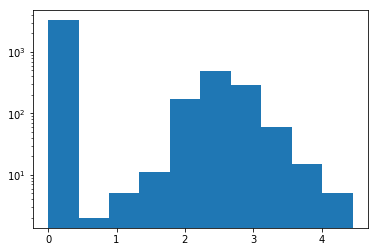

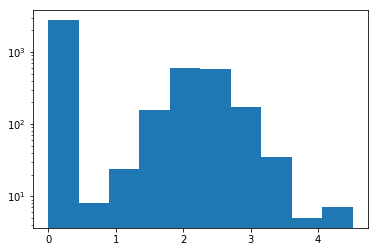

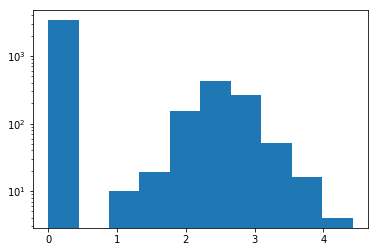

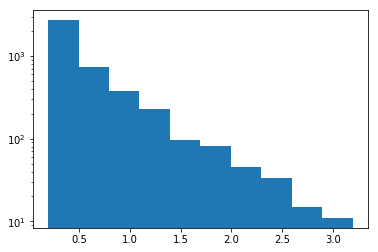

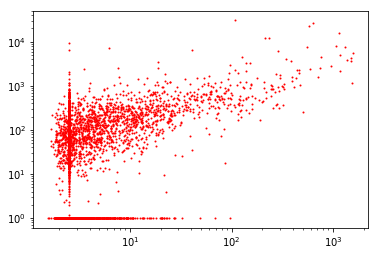

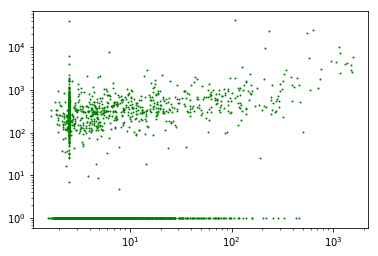

In [83]:
plt.hist(customer_info_orders['target']);
plt.yscale('log');plt.yscale('log');plt.show();plt.close()
plt.hist(customer_info_orders['target4']);
plt.yscale('log');plt.yscale('log');plt.show();plt.close()
plt.hist(customer_info_orders['target3']);
plt.yscale('log');plt.yscale('log');plt.show();plt.close()
plt.hist(model.predict(xgtest3));
plt.yscale('log');plt.yscale('log');plt.show();plt.close()


plt.plot(10**model.predict(xgtest2),10**customer_info_orders['target5'],'ro',markersize=1);
plt.xscale('log');plt.yscale('log');
plt.show();plt.close()
plt.plot(10**model.predict(xgtest2),10**customer_info_orders['target2'],'go',markersize=1);
plt.xscale('log');plt.yscale('log');
plt.show();plt.close()
#plt.plot(model.predict(xgtest3),customer_info_orders['target4'],'bo')
#plt.plot(model.predict(xgtest3),customer_info_orders['target5'],'yo')
#plt.show()

In [ ]:
# analysis
# can we see why are there some who dropped ?

In [32]:
# LINEAR LOSS
import xgboost as xgb
#predict customer orders
'''
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,3,4])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([5])))]
test2 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,])))]
test3 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([7,])))]
test4 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,])))]
test5 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,8,9,10,11])))]

len(train),len(test),len(test2),len(test3),len(test4),len(test5)
'''
customer_info_orders.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in customer_info_orders.columns.values]

predictors = list(customer_info_orders.keys()[3:8])+['mean_log_rev_train',]+\
                     list([x for x in customer_info_orders.keys() if 'svvd' in str(x)])
                    # range(counter)+\
colsA =  ['Revenue_2011_' + str(x) for x in [1,2,3,4]]+['Revenue_2010_12']
customer_info_orders['mean_log_rev_train']= 1+np.mean(customer_info_orders[colsA].values,1)

target = 'target'
gc.collect()
for i in range(2,6):
    cols = [[0,],[0,],[6,],[7,],[6,7],[6,7,8,9,10,11]][i]
    cols = ['Revenue_2011_'+str(x) for x in cols]
    customer_info_orders[target+str(i)]= 1+np.mean(customer_info_orders[cols].values,1)
def percent_error(predt, dtrain) :#-> Tuple[str, float]:
    ''' Root mean squared log error metric.'''
    y = dtrain.get_label()
    predt[predt < 0] = 1
    elements = np.power(np.log10(y) - np.log10(predt), 2)
    return 'PyRMSLE', float(np.sqrt(np.sum(elements) / len(y)))

if True:
    customer_info_orders[target]= 1+np.mean(customer_info_orders[['Revenue_2011_5',]].values,1)
    dtrain = customer_info_orders.iloc[::2]
    dcv = customer_info_orders.iloc[1::2]
    dtest = customer_info_orders
    gc.collect()
    params = {}
    params["objective"] = "reg:linear"
    params["eta"] = 0.2
    params["min_child_weight"] = 1
    params["subsample"] = 0.3
    params["colsample_bytree"] = 0.3
    params["scale_pos_weight"] = 1.0
    params["silent"] = 1
    params["verbose"] = 1
    params["max_depth"] = 5
    #params["nthread"] = 6
    params["nthread"] = -1
    early_stopping_rounds = 50
    plst = list(params.items())
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
    xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
    xgtest2 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'2'].values)
    xgtest3 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'3'].values)
    xgtest4 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'4'].values)
    xgtest5 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'5'].values)
    #    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
    #            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
    watchlist  = [ (xgtrain,'train'),(xgtest2,'2month'),(xgtest3,'3month'),
                  (xgtest4,'4month'),(xgtest5,'5month'),(xgcv,'eval')][:]
    a = {}
    model=xgb.train(plst,xgtrain,310,watchlist,verbose_eval =100,feval=percent_error,
                    early_stopping_rounds=early_stopping_rounds,evals_result=a)
    print np.corrcoef(np.nan_to_num(np.log10(model.predict(xgtest2)[1::2])),np.log10(customer_info_orders['target'].iloc[1::2]))
    for j in range(2,6):
        j = str(j)
        print np.corrcoef(np.nan_to_num(np.log10(model.predict(xgtest2))),np.log10(1+customer_info_orders['target'+j]))

[0]	train-rmse:617.876	2month-rmse:1115.84	3month-rmse:700.486	4month-rmse:792.895	5month-rmse:856.22	eval-rmse:829.467	train-PyRMSLE:1.23854	2month-PyRMSLE:1.24771	3month-PyRMSLE:1.2483	4month-PyRMSLE:1.17158	5month-PyRMSLE:0.970574	eval-PyRMSLE:1.24256
Multiple eval metrics have been passed: 'eval-PyRMSLE' will be used for early stopping.

Will train until eval-PyRMSLE hasn't improved in 50 rounds.
Stopping. Best iteration:
[0]	train-rmse:617.876	2month-rmse:1115.84	3month-rmse:700.486	4month-rmse:792.895	5month-rmse:856.22	eval-rmse:829.467	train-PyRMSLE:1.23854	2month-PyRMSLE:1.24771	3month-PyRMSLE:1.2483	4month-PyRMSLE:1.17158	5month-PyRMSLE:0.970574	eval-PyRMSLE:1.24256

[[1.       0.294417]
 [0.294417 1.      ]]
[[1.        0.2510308]
 [0.2510308 1.       ]]
[[1.         0.29678026]
 [0.29678026 1.        ]]
[[1.         0.30371901]
 [0.30371901 1.        ]]
[[1.         0.29876221]
 [0.29876221 1.        ]]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:68: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:71: RuntimeWarning: invalid value encountered in log10


In [33]:
np.mean(np.abs((model.predict(xgtest2)-customer_info_orders['target'+j])/customer_info_orders['target'+j])
       )

22.270436603958476

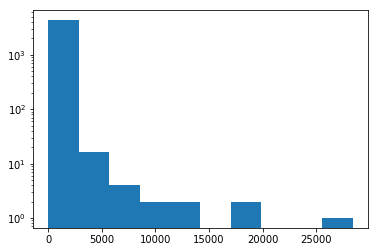

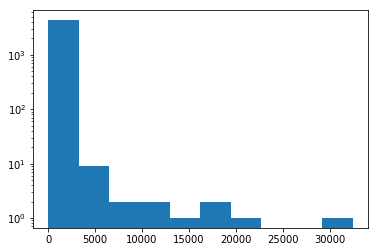

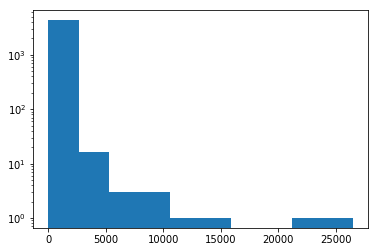

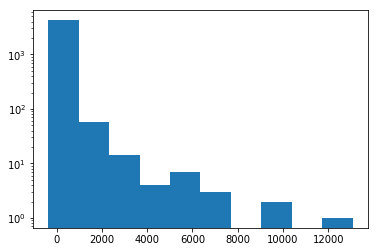

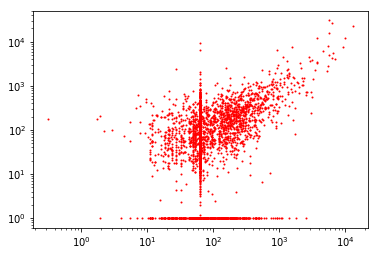

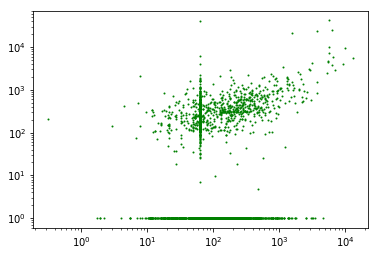

In [34]:
plt.hist(customer_info_orders['target']);
plt.yscale('log');plt.yscale('log');plt.show();plt.close()
plt.hist(customer_info_orders['target4']);
plt.yscale('log');plt.yscale('log');plt.show();plt.close()
plt.hist(customer_info_orders['target3']);
plt.yscale('log');plt.yscale('log');plt.show();plt.close()
plt.hist(model.predict(xgtest3));
plt.yscale('log');plt.yscale('log');plt.show();plt.close()


plt.plot(model.predict(xgtest3),customer_info_orders['target5'],'ro',markersize=1);
plt.xscale('log');plt.yscale('log');
plt.show();plt.close()
plt.plot(model.predict(xgtest2),customer_info_orders['target2'],'go',markersize=1);
plt.xscale('log');plt.yscale('log');
plt.show();plt.close()
#plt.plot(model.predict(xgtest3),customer_info_orders['target4'],'bo')
#plt.plot(model.predict(xgtest3),customer_info_orders['target5'],'yo')
#plt.show()

In [35]:
import xgboost as xgb
customer_info_orders.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in customer_info_orders.columns.values]

predictors = list(customer_info_orders.keys()[3:6])+\
                     list([x for x in customer_info_orders.keys() if 'svd' in str(x)])+\
                     range(counter)
target = 'target'
for i in range(10):
    customer_info_orders[target]= np.log10(1+matrix_future[:,i])
    customer_info_orders[target+'2']= np.log10(1+matrix_future2[:,i])
    customer_info_orders[target+'3']= np.log10(1+matrix_future3[:,i])
    customer_info_orders[target+'4']= np.log10(1+matrix_future4[:,i])
    customer_info_orders[target+'5']= np.log10(1+matrix_future5[:,i])
    dtrain = customer_info_orders.iloc[::2]
    dcv = customer_info_orders.iloc[1::2]
    dtest = customer_info_orders
    gc.collect()
    params = {}
    params["objective"] = "reg:linear"
    params["eta"] = 0.05
    params["min_child_weight"] = 1
    params["subsample"] = 0.3
    params["colsample_bytree"] = 0.3
    params["scale_pos_weight"] = 1.0
    params["silent"] = 1
    params["verbose"] = 1
    params["max_depth"] = 5
    #params["nthread"] = 6
    params["nthread"] = -1
    early_stopping_rounds = 50
    plst = list(params.items())
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
    xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
    xgtest2 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'2'].values)
    xgtest3 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'3'].values)
    xgtest4 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'4'].values)
    xgtest5 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'5'].values)
    #    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
    #            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
    watchlist  = [ (xgtrain,'train'),(xgtest2,'2month'),(xgtest3,'3month'),
                  (xgtest4,'4month'),(xgtest5,'5month'),(xgcv,'eval')]
    a = {}
    model=xgb.train(plst,xgtrain,4500,watchlist,verbose_eval =5000,
                    early_stopping_rounds=early_stopping_rounds,evals_result=a)
    for j in range(2,6):
        j = str(j)
        print np.corrcoef(model.predict(xgtest3),customer_info_orders['target'+j])

KeyError: '[0 1 2 ... 2674 2675 2676] not in index'

In [ ]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.05
params["min_child_weight"] = 1
params["subsample"] = 0.3
params["colsample_bytree"] = 0.3
params["scale_pos_weight"] = 1.0
params["silent"] = 1
params["verbose"] = 1
params["max_depth"] = 5
#params["nthread"] = 6
params["nthread"] = -1
early_stopping_rounds = 50
plst = list(params.items())
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
xgtest2 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'2'].values)
xgtest3 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'3'].values)
xgtest4 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'4'].values)
xgtest5 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'5'].values)
#    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
#            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
watchlist  = [ (xgtrain,'train'),(xgtest2,'2month'),(xgtest3,'3month'),
              (xgtest4,'4month'),(xgtest5,'5month'),(xgcv,'eval')]
a = {}
model=xgb.train(plst,xgtrain,4500,watchlist,verbose_eval =50,
                early_stopping_rounds=early_stopping_rounds,evals_result=a)
model.get_fscore

In [ ]:
U.shape

In [ ]:
V.shape

In [ ]:

for i in range(len(predictors)):
    try:
        print model.get_fscore()['f'+str(i)],predictors[i]
    except : 
        print 0,predictors[i]

In [ ]:
np.matmul(np.matmul(U,np.diag(np.concatenate([D,[0,]*(len(U)-len(D))]))[:,:len(V)]),V)